# Creating and Backtesting EMA Strategies

---

# Getting the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [2]:
data = pd.read_csv("../Data/eurusd.csv", parse_dates = ["Date"], index_col = "Date")

In [3]:
data

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4275 entries, 2004-01-01 to 2020-06-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   4275 non-null   float64
dtypes: float64(1)
memory usage: 66.8 KB


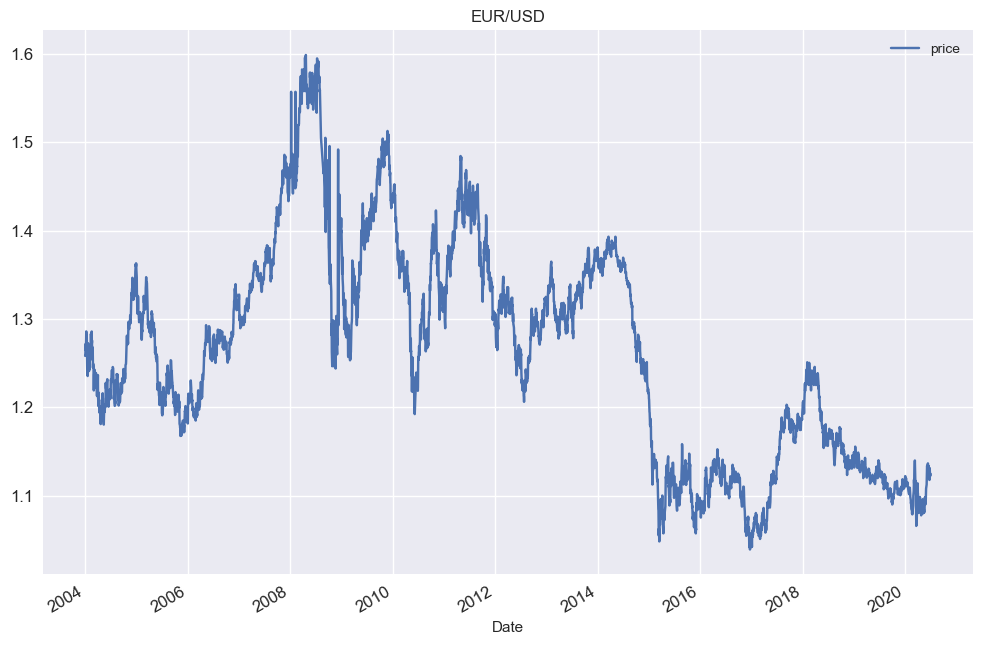

In [5]:
data.plot(figsize = (12, 8), title = "EUR/USD", fontsize = 12)
plt.show()

---

# EMA vs. SMA

> __How to calculate the `Exponential Moving Avarage`__ 

> __What is the different between `Exponential Moving Avarage` and `Simple Moving Avarage` ?__

In [6]:
data

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [7]:
window = 50

In [8]:
# We can compute the EMA witout minimum period.
# its mean that there is no missing values on the edgs.
# the EMA will calculate from the first data point

# span => EMA of most recent 50 days
data.price.ewm(span = window).mean() 

Date
2004-01-01    1.258194
2004-01-02    1.258194
2004-01-05    1.261836
2004-01-06    1.264559
2004-01-07    1.264458
                ...   
2020-06-24    1.109674
2020-06-25    1.110279
2020-06-26    1.110746
2020-06-29    1.111211
2020-06-30    1.111741
Name: price, Length: 4275, dtype: float64

In [9]:
# Compute the Exponential Moving Avarage
# Here we can defind the `min_periods`:
# this is the minimum number of observation for calculate the EMA.
# if we dont have this number of observation. we dont calculate the EMA.
# that's the reason way we have NaN on the up edg. 
data.price.ewm(span = window, min_periods = window).mean() 

Date
2004-01-01         NaN
2004-01-02         NaN
2004-01-05         NaN
2004-01-06         NaN
2004-01-07         NaN
                ...   
2020-06-24    1.109674
2020-06-25    1.110279
2020-06-26    1.110746
2020-06-29    1.111211
2020-06-30    1.111741
Name: price, Length: 4275, dtype: float64

In [10]:
# Compute & store the short Exponential Moving Avarage
data["EMA_S"] = data.price.ewm(span = window, min_periods = window).mean() 

In [11]:
# Compute & stire the short Simple Moving Avarage
data["SMA_S"] = data.price.rolling(window).mean() 

In [12]:
data

,price,EMA_S,SMA_S
Date,,,
2004-01-01,1.258194,NaN,NaN
2004-01-02,1.258194,NaN,NaN
2004-01-05,1.268698,NaN,NaN
2004-01-06,1.272103,NaN,NaN
2004-01-07,1.264095,NaN,NaN
...,...,...,...
2020-06-24,1.131235,1.109674,1.101794
2020-06-25,1.125087,1.110279,1.102486
2020-06-26,1.122208,1.110746,1.103213


__Plot SMA & EMA with the same hyperparameters__

- Interpretation:
    - > the EMA more sensitive and take more weigths on the recents observation. As a result, the `EMA` adjust more quickly the `SMA`. 
    - > EMA react more dynamicaly to the most recent prices.  

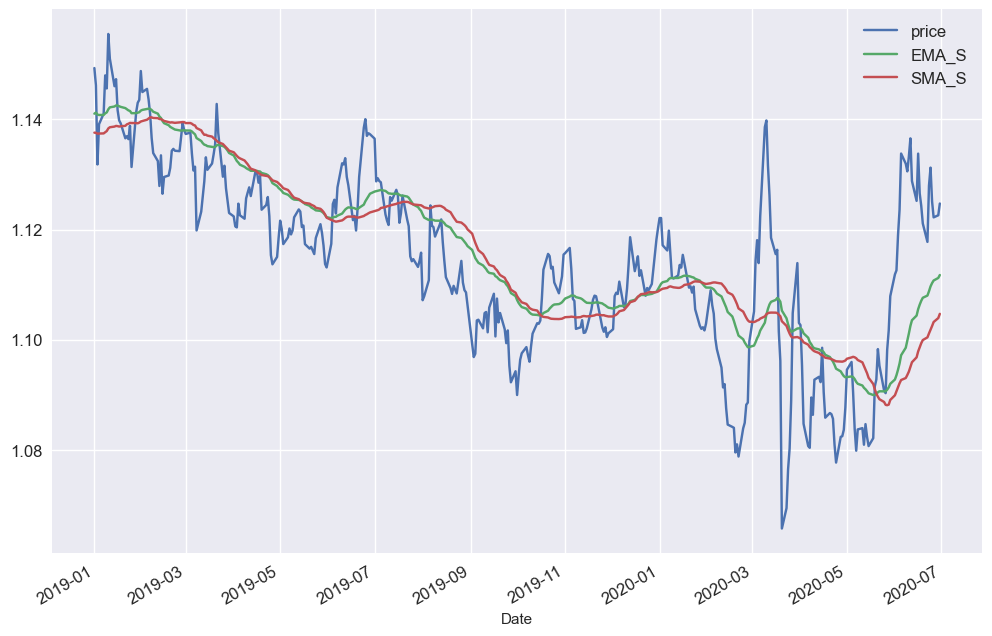

In [13]:
data.loc["2019":].plot(figsize = (12, 8), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

---

# Defining an EMA Crossover Strategy

In [14]:
# Let's drop the old columns (we'll recompute again)
data.drop(columns = ["EMA_S", "SMA_S"], inplace = True)

In [15]:
data

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [16]:
ema_s = 50  # short Exponential Moving Avarage
ema_l = 200 # long Exponential Moving Avarage

In [17]:
# Compute short Exponential Moving Avarage
data["EMA_S"] = data.price.ewm(span = ema_s, min_periods = ema_s).mean() 

In [18]:
# Compute long Exponential Moving Avarage
data["EMA_L"] = data.price.ewm(span = ema_l, min_periods = ema_l).mean() 

In [19]:
data

,price,EMA_S,EMA_L
Date,,,
2004-01-01,1.258194,NaN,NaN
2004-01-02,1.258194,NaN,NaN
2004-01-05,1.268698,NaN,NaN
2004-01-06,1.272103,NaN,NaN
2004-01-07,1.264095,NaN,NaN
...,...,...,...
2020-06-24,1.131235,1.109674,1.106470
2020-06-25,1.125087,1.110279,1.106655
2020-06-26,1.122208,1.110746,1.106810


__Plot the short & long EMAs__

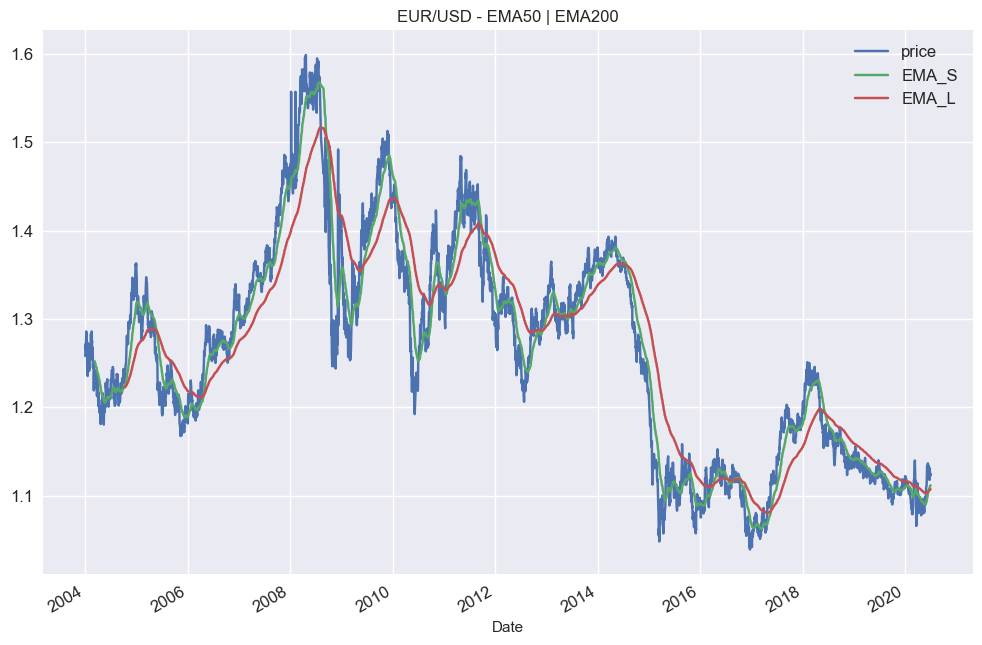

In [20]:
data.plot(figsize = (12, 8), title = "EUR/USD - EMA{} | EMA{}".format(ema_s, ema_l), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

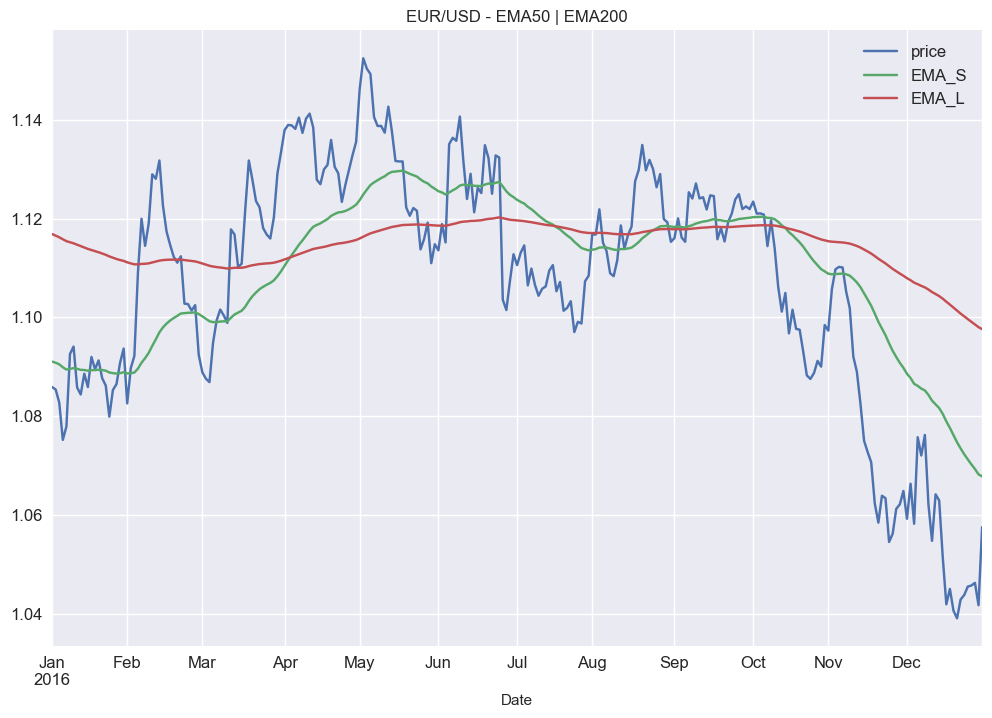

In [21]:
data.loc["2016", ["price", "EMA_S", "EMA_L"]].plot(figsize = (12, 8), fontsize = 12,
                                                   title = "EUR/USD - EMA{} | EMA{}".format(ema_s, ema_l))
plt.legend(fontsize = 12)
plt.show()

__Cross EMA strategy__

In [22]:
# - Short EMA corss the long EMA ? signal to BUY (1)
# - Long EMA corss the short EMA ? signal to SELL (-1)
data["position"] = np.where(data["EMA_S"] > data["EMA_L"], 1, -1 )

In [23]:
data

,price,EMA_S,EMA_L,position
Date,,,,
2004-01-01,1.258194,NaN,NaN,-1
2004-01-02,1.258194,NaN,NaN,-1
2004-01-05,1.268698,NaN,NaN,-1
2004-01-06,1.272103,NaN,NaN,-1
2004-01-07,1.264095,NaN,NaN,-1
...,...,...,...,...
2020-06-24,1.131235,1.109674,1.106470,1
2020-06-25,1.125087,1.110279,1.106655,1
2020-06-26,1.122208,1.110746,1.106810,1


__Plot the positions based on cross EMA strategy__

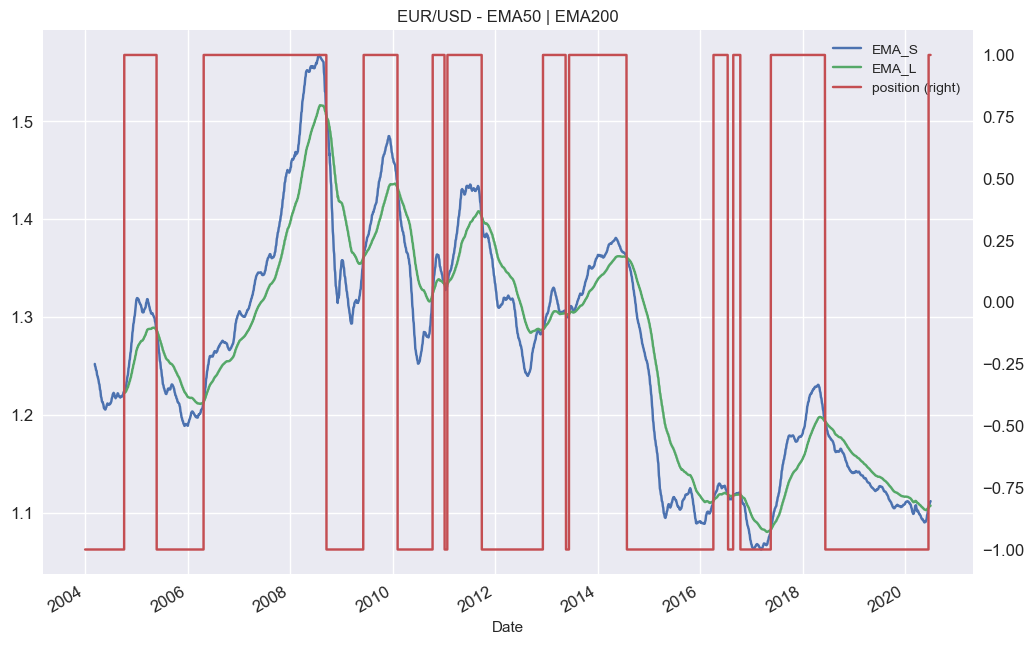

In [24]:
data.loc[:, ["EMA_S", "EMA_L", "position"]].plot(figsize = (12, 8), fontsize = 12, secondary_y = "position",
                                                 title = "EUR/USD - EMA{} | EMA{}".format(ema_s, ema_l))
plt.show()

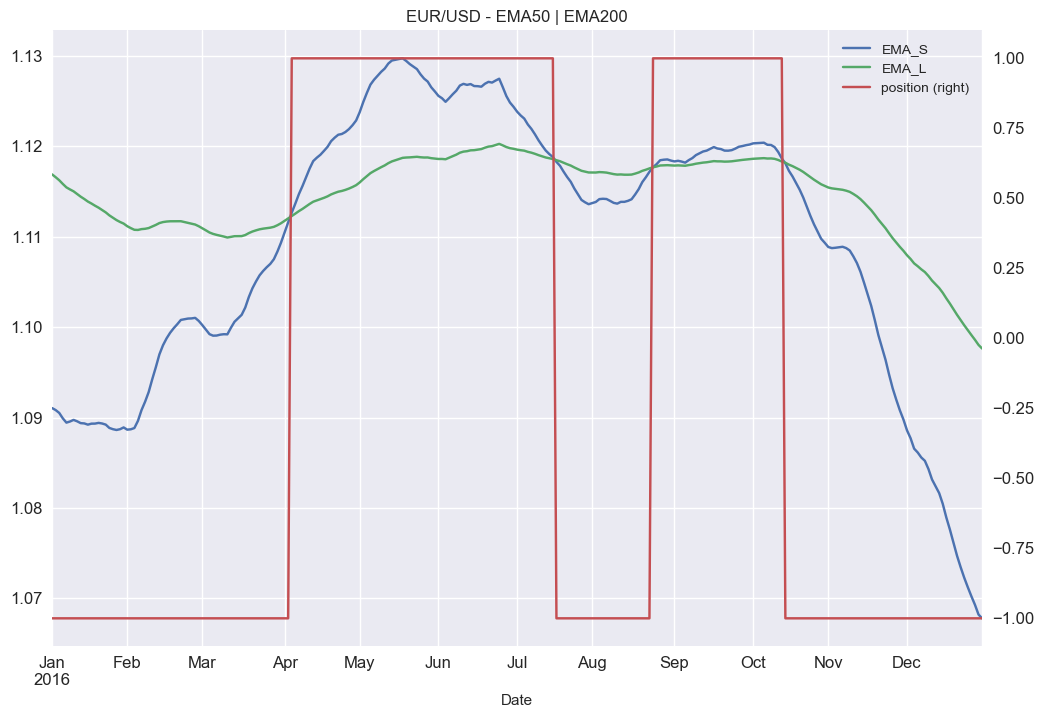

In [25]:
data.loc["2016", ["EMA_S", "EMA_L", "position"]].plot(figsize = (12, 8), fontsize = 12, secondary_y = "position",
                                                     title = "EUR/USD - EMA{} | EMA{}".format(ema_s, ema_l))
plt.show()

---

# Vectorized Strategy Backtesting

In [26]:
data

,price,EMA_S,EMA_L,position
Date,,,,
2004-01-01,1.258194,NaN,NaN,-1
2004-01-02,1.258194,NaN,NaN,-1
2004-01-05,1.268698,NaN,NaN,-1
2004-01-06,1.272103,NaN,NaN,-1
2004-01-07,1.264095,NaN,NaN,-1
...,...,...,...,...
2020-06-24,1.131235,1.109674,1.106470,1
2020-06-25,1.125087,1.110279,1.106655,1
2020-06-26,1.122208,1.110746,1.106810,1


In [27]:
# compute the log return
data["returns"] = np.log(data.price.div(data.price.shift(1)))

In [28]:
data.dropna(inplace = True)

In [29]:
data

,price,EMA_S,EMA_L,position,returns
Date,,,,,
2004-10-06,1.228094,1.223852,1.222221,1,-0.002853
2004-10-07,1.229906,1.224089,1.222309,1,0.001475
2004-10-08,1.241003,1.224753,1.222524,1,0.008982
2004-10-11,1.238405,1.225288,1.222706,1,-0.002095
2004-10-12,1.232104,1.225556,1.222813,1,-0.005102
...,...,...,...,...,...
2020-06-24,1.131235,1.109674,1.106470,1,0.002892
2020-06-25,1.125087,1.110279,1.106655,1,-0.005449
2020-06-26,1.122208,1.110746,1.106810,1,-0.002562


In [30]:
# Compute the return of the strategy
data["strategy"] = data.position.shift(1) * data["returns"]

In [31]:
data

,price,EMA_S,EMA_L,position,returns,strategy
Date,,,,,,
2004-10-06,1.228094,1.223852,1.222221,1,-0.002853,NaN
2004-10-07,1.229906,1.224089,1.222309,1,0.001475,0.001475
2004-10-08,1.241003,1.224753,1.222524,1,0.008982,0.008982
2004-10-11,1.238405,1.225288,1.222706,1,-0.002095,-0.002095
2004-10-12,1.232104,1.225556,1.222813,1,-0.005102,-0.005102
...,...,...,...,...,...,...
2020-06-24,1.131235,1.109674,1.106470,1,0.002892,0.002892
2020-06-25,1.125087,1.110279,1.106655,1,-0.005449,-0.005449
2020-06-26,1.122208,1.110746,1.106810,1,-0.002562,-0.002562


In [32]:
data.dropna(inplace = True)

In [33]:
ptc = 0.00007

In [34]:
# Determine whether we make trade 
# trade = change the position
data["trades"] = data.position.diff().fillna(0).abs()

# Understend how its work by an example
# 1 - (-1) = 0 = we dont take new position.
# abs(- 1 - 1) = 2 = from short position we take long position (2 trades)   
# abs(1 - (-1)) = 2 = from long position we take short position (2 trades)   

# So, where we DONT change the position - it will be 0. 

In [35]:
data.trades.value_counts()

trades
0.0    4055
2.0      20
Name: count, dtype: int64

In [36]:
ptc = 0.00007 # trading costs per trade. 

In [37]:
# Compute the neto return of the strategy (substructing trading costs)
# its the return of the strategy - the tays we take trades * trading costs. 
data["strategy_net"] = data.strategy - data.trades * ptc

In [38]:
## absulute performance

# Compute the cumelative return of buy and hold
data["creturns"] = data["returns"].cumsum().apply(np.exp)
# Compute the cumelative return of cross EMA strategy, exc tc
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
# Compute the cumelative return of cross EMA strategy, inc tc
data["cstrategy_net"] = data["strategy_net"].cumsum().apply(np.exp)

In [39]:
data

,price,EMA_S,EMA_L,position,returns,strategy,trades,strategy_net,creturns,cstrategy,cstrategy_net
Date,,,,,,,,,,,
2004-10-07,1.229906,1.224089,1.222309,1,0.001475,0.001475,0.0,0.001475,1.001476,1.001476,1.001476
2004-10-08,1.241003,1.224753,1.222524,1,0.008982,0.008982,0.0,0.008982,1.010511,1.010511,1.010511
2004-10-11,1.238405,1.225288,1.222706,1,-0.002095,-0.002095,0.0,-0.002095,1.008396,1.008396,1.008396
2004-10-12,1.232104,1.225556,1.222813,1,-0.005102,-0.005102,0.0,-0.005102,1.003265,1.003265,1.003265
2004-10-13,1.234903,1.225922,1.222951,1,0.002270,0.002270,0.0,0.002270,1.005545,1.005545,1.005545
...,...,...,...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,1.109674,1.106470,1,0.002892,0.002892,0.0,0.002892,0.921130,1.283363,1.279774
2020-06-25,1.125087,1.110279,1.106655,1,-0.005449,-0.005449,0.0,-0.005449,0.916125,1.276389,1.272820
2020-06-26,1.122208,1.110746,1.106810,1,-0.002562,-0.002562,0.0,-0.002562,0.913781,1.273123,1.269563


__Plot__:
- Buy and hold
- EMA (exclude trading cost)
- EMA (include trading cost)

> We can see that the trading costs have minor impace to our strategy.. 

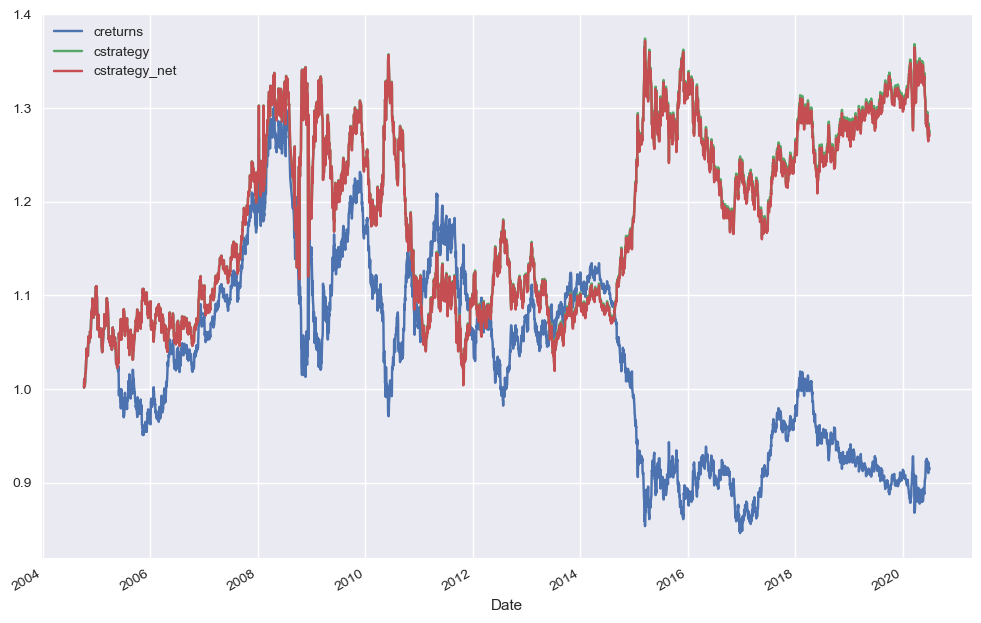

In [40]:
data[["creturns", "cstrategy", "cstrategy_net"]].plot(figsize = (12 , 8))
plt.show()

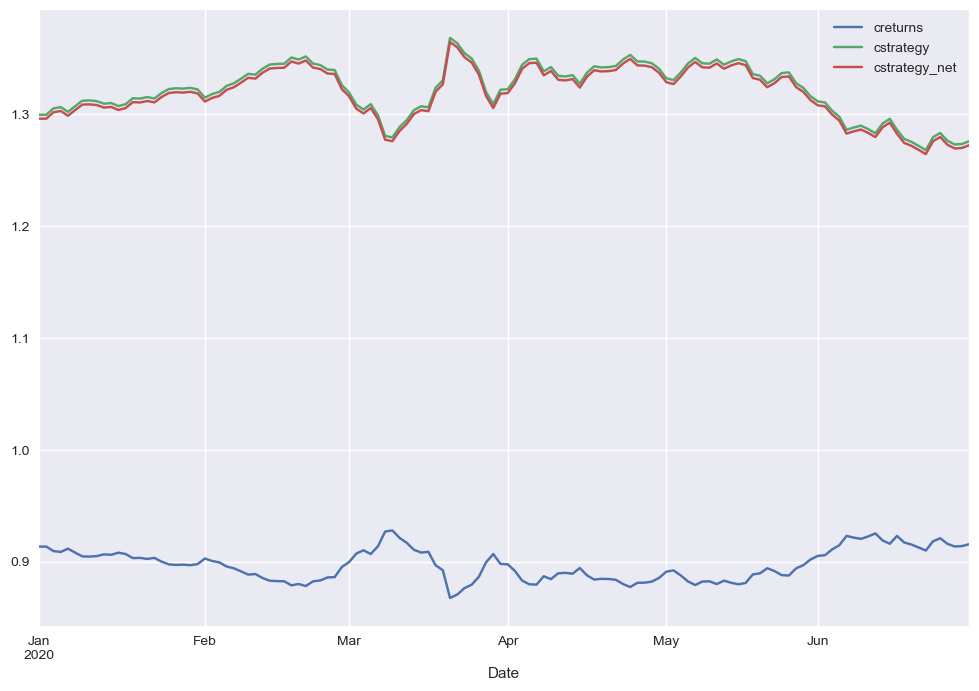

In [41]:
data.loc["2020", ["creturns", "cstrategy", "cstrategy_net"]].plot(figsize = (12 , 8))
plt.show()

---

# Using the EMABacktester Class

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brute
plt.style.use("seaborn-v0_8")

In [43]:
from EMABacktester import EMABacktester as EMA

In [44]:
ptc = 0.00007

In [45]:
tester = EMA("EURUSD=X", 50, 200, "2004-01-01", "2020-06-30", ptc)

In [46]:
tester

EMABacktester(symbol = EURUSD=X, EMA_S = 50, EMA_L = 200, start = 2004-01-01, end = 2020-06-30)

In [47]:
tester.test_strategy()

(1.272405, 0.356579)

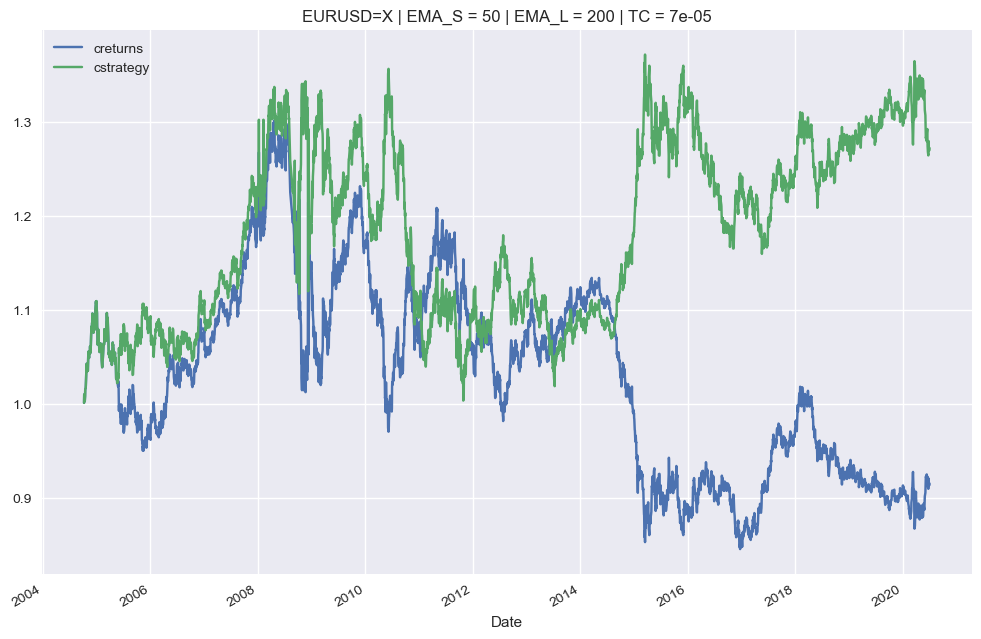

In [48]:
tester.plot_results()

In [49]:
tester.optimize_parameters((25, 75, 1), (100, 200, 1))

(array([ 36., 168.]), 1.661631)

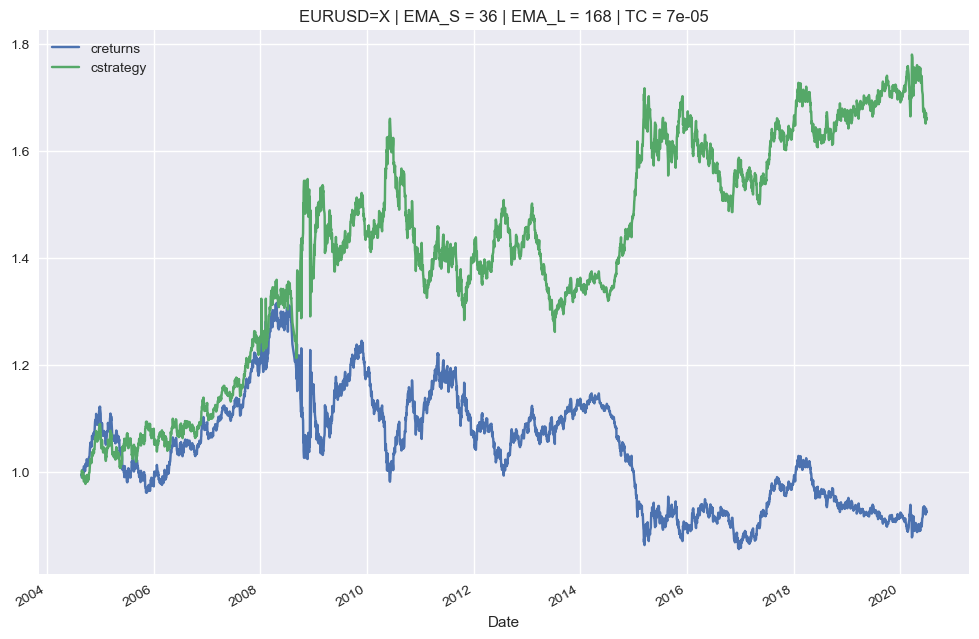

In [50]:
tester.plot_results()

__Special Case: Price/EMA Crossover__

In [51]:
tester.set_parameters(1, 50)

In [52]:
tester.test_strategy()

(0.507159, -0.412333)

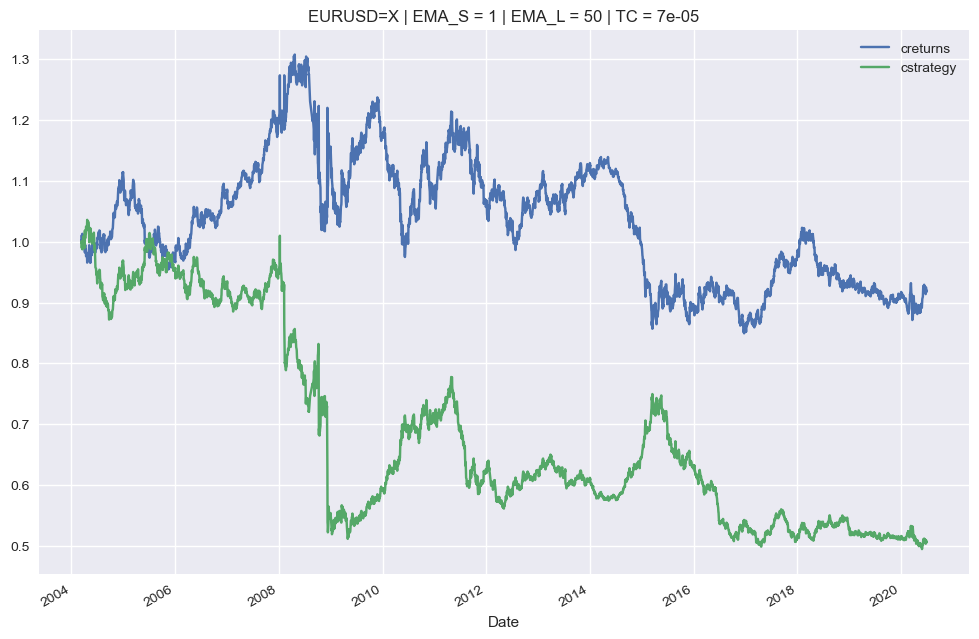

In [53]:
tester.plot_results()

In [54]:
tester.results.trades.value_counts()

trades
0.0    3858
2.0     367
Name: count, dtype: int64

__AUD / EUR__

In [55]:
tester = EMA("AUDEUR=X", 50, 200, "2004-01-01", "2020-06-30", 0)

In [56]:
tester.test_strategy()

(0.966382, -0.072754)

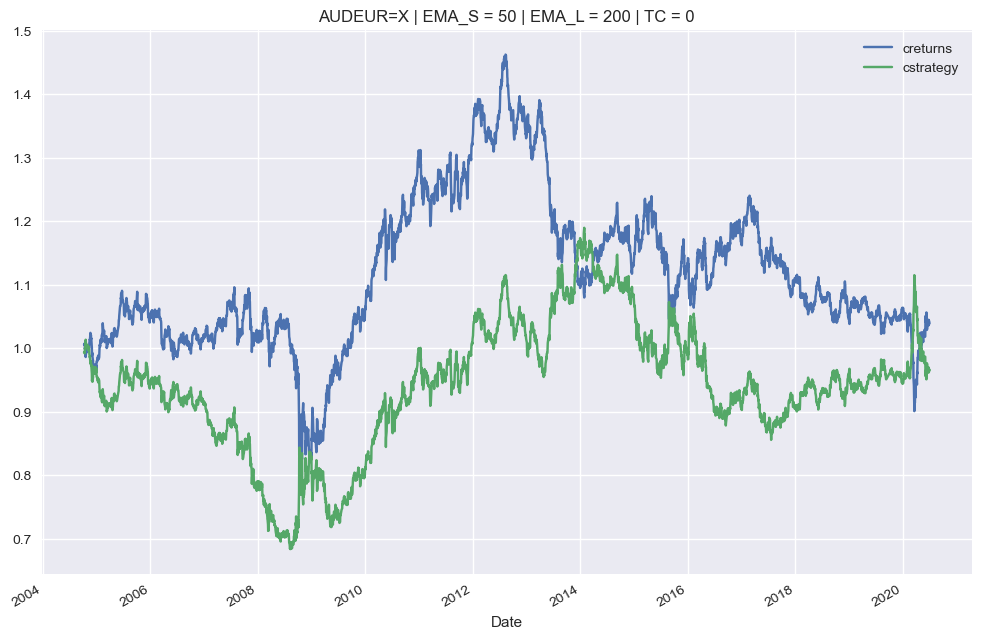

In [57]:
tester.plot_results()

In [58]:
tester.optimize_parameters((25, 75, 1), (100, 200, 1))

(array([ 71., 144.]), 1.201493)

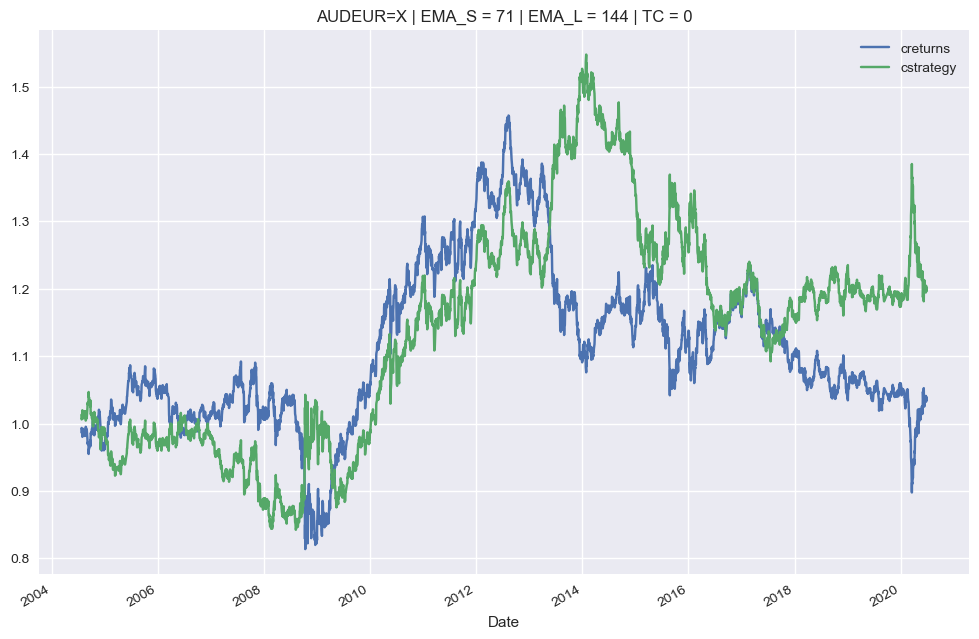

In [59]:
tester.plot_results()